DO TRUNG NGUYEN - B1709552

# setting & import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 686kB 31.4MB/s 


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten
import tensorflow_addons as tfa

In [ ]:
birds_song_wav_mfcc_1 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_1.json'
birds_song_wav_mfcc_2 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_2.json'
birds_song_wav_mfcc_3 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_3.json'
birds_song_wav_mfcc_4 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_4.json'
birds_song_wav_mfcc_5 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_5.json'
birds_song_wav_mfcc_6 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_6.json'
birds_song_wav_mfcc_7 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_7.json'
birds_song_wav_mfcc_8 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_8.json'
birds_song_wav_mfcc_9 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_9.json'
birds_song_wav_mfcc_10 = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/birds_song_wav_mfcc_10.json'

SAVED_MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5'

BATCH_SIZE = 32
PATIENCE = 5
NUM_CLASS = 50

# load data

In [ ]:
def load_y(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    y = np.array(data["label"])

    print("load data train")
    return y

In [ ]:
def load_X(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])

    print("load data train")
    return X

In [ ]:
def prepare_dataset(data_path, validation_size=0.2):

    # # load dataset
    # y = load_y(data_path)
    # X = load_X(data_path)
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["label"])
    
    X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    # X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation #, X_test, y_test

# train setting

In [ ]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """
    -  epochs (int): số vòng lập đào tạo
    -  batch_size (int): số mẫu trên một batch
    -  patience (int): dừng lại nếu phát hiện không có sự tăng độ chính xác
    -  min_delta (float): độ tăng tối thiểu độ chính xác
    """

    # EarlyStopping: cho phép dừng quá trình đạo tạo
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    SAVED_MODEL_PATH,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch"
)

    # training
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback,checkpoint_callback])
    return history

# show plot history

In [ ]:
def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

# build model

In [ ]:
def build_model_8(input_shape):

    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dropout(0.4))

    # output layer
    model.add(keras.layers.Dense(50, activation='softmax'))

    # compile model
    learning_rate = 0.0001
    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)
    loss = "sparse_categorical_crossentropy"
    model.compile(optimizer=optimiser,loss=loss,metrics=['accuracy'])

    model._name = "model_08"

    model.summary()

    return model

# training

In [ ]:
X_train, y_train, X_validation, y_validation= prepare_dataset(birds_song_wav_mfcc_1)
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
input_shape

(259, 13, 1)

Model: "model_08"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 257, 11, 64)       640       
_________________________________________________________________
batch_normalization_12 (Batc (None, 257, 11, 64)       256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 129, 6, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 127, 4, 32)        18464     
_________________________________________________________________
batch_normalization_13 (Batc (None, 127, 4, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 2, 32)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 2, 64)         184

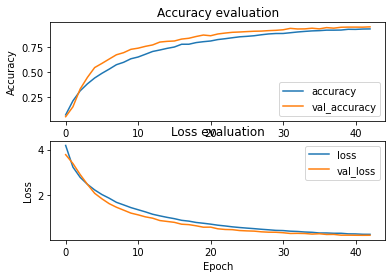

In [ ]:
model = build_model_8(input_shape)
history = train(model, 43, 128, PATIENCE, X_train, y_train, X_validation, y_validation)
plot_history(history)

In [ ]:
X_train_2, y_train_2, X_validation_2, y_validation_2= prepare_dataset(birds_song_wav_mfcc_2)
input_shape = (X_train_2.shape[1], X_train_2.shape[2], 1)

Epoch 1/43
65/65 [==============================] - 3s 45ms/step - loss: 2.8606 - accuracy: 0.4460 - val_loss: 1.7887 - val_accuracy: 0.5745

Epoch 00001: val_loss improved from inf to 1.78873, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
65/65 [==============================] - 3s 42ms/step - loss: 1.5811 - accuracy: 0.6045 - val_loss: 1.1722 - val_accuracy: 0.6970

Epoch 00002: val_loss improved from 1.78873 to 1.17224, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
65/65 [==============================] - 3s 43ms/step - loss: 1.2876 - accuracy: 0.6652 - val_loss: 0.9250 - val_accuracy: 0.7556

Epoch 00003: val_loss improved from 1.17224 to 0.92500, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
65/65 [==============================] - 3s 43ms/step - loss: 1.1089 - accuracy: 0.7032 - val_loss: 0.7453 -

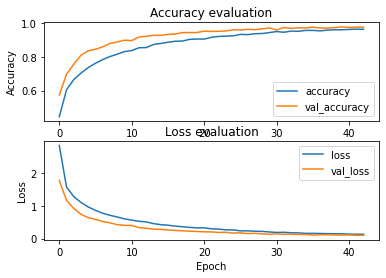

In [ ]:
history = train(model, 43, 128, PATIENCE, X_train_2, y_train_2, X_validation_2, y_validation_2)
plot_history(history)

In [ ]:
X_train_3, y_train_3, X_validation_3, y_validation_3= prepare_dataset(birds_song_wav_mfcc_3)
input_shape = (X_train_3.shape[1], X_train_3.shape[2], 1)

Epoch 1/43
63/63 [==============================] - 3s 45ms/step - loss: 2.6385 - accuracy: 0.4892 - val_loss: 2.2594 - val_accuracy: 0.4950

Epoch 00001: val_loss improved from inf to 2.25944, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
63/63 [==============================] - 3s 42ms/step - loss: 1.3390 - accuracy: 0.6541 - val_loss: 1.1038 - val_accuracy: 0.7172

Epoch 00002: val_loss improved from 2.25944 to 1.10381, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
63/63 [==============================] - 3s 43ms/step - loss: 1.0765 - accuracy: 0.7150 - val_loss: 0.8117 - val_accuracy: 0.7858

Epoch 00003: val_loss improved from 1.10381 to 0.81170, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
63/63 [==============================] - 3s 43ms/step - loss: 0.9075 - accuracy: 0.7543 - val_loss: 0.6626 -

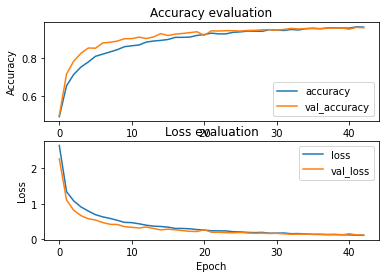

In [ ]:

history = train(model, 43, 128, PATIENCE, X_train_3, y_train_3, X_validation_3, y_validation_3)
plot_history(history)

In [ ]:
X_train_4, y_train_4, X_validation_4, y_validation_4= prepare_dataset(birds_song_wav_mfcc_4)
input_shape = (X_train_4.shape[1], X_train_4.shape[2], 1)

Epoch 1/43
70/70 [==============================] - 3s 43ms/step - loss: 2.5494 - accuracy: 0.5281 - val_loss: 1.7622 - val_accuracy: 0.5919

Epoch 00001: val_loss improved from inf to 1.76222, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
70/70 [==============================] - 3s 42ms/step - loss: 1.2492 - accuracy: 0.6832 - val_loss: 1.0634 - val_accuracy: 0.7335

Epoch 00002: val_loss improved from 1.76222 to 1.06342, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
70/70 [==============================] - 3s 42ms/step - loss: 0.9884 - accuracy: 0.7346 - val_loss: 0.7549 - val_accuracy: 0.8059

Epoch 00003: val_loss improved from 1.06342 to 0.75494, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
70/70 [==============================] - 3s 42ms/step - loss: 0.8056 - accuracy: 0.7809 - val_loss: 0.6289 -

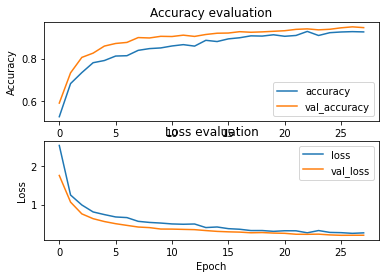

In [ ]:
history = train(model, 43, 128, PATIENCE,X_train_4, y_train_4, X_validation_4, y_validation_4)
plot_history(history)

In [ ]:
X_train_5, y_train_5, X_validation_5, y_validation_5= prepare_dataset(birds_song_wav_mfcc_5)
input_shape = (X_train_5.shape[1], X_train_5.shape[2], 1)

Epoch 1/43
69/69 [==============================] - 3s 44ms/step - loss: 2.6580 - accuracy: 0.4775 - val_loss: 1.8404 - val_accuracy: 0.5403

Epoch 00001: val_loss improved from inf to 1.84042, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
69/69 [==============================] - 3s 43ms/step - loss: 1.4420 - accuracy: 0.6336 - val_loss: 1.1227 - val_accuracy: 0.6907

Epoch 00002: val_loss improved from 1.84042 to 1.12272, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
69/69 [==============================] - 3s 42ms/step - loss: 1.1678 - accuracy: 0.6848 - val_loss: 0.8598 - val_accuracy: 0.7822

Epoch 00003: val_loss improved from 1.12272 to 0.85977, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
69/69 [==============================] - 3s 43ms/step - loss: 1.0100 - accuracy: 0.7246 - val_loss: 0.7141 -

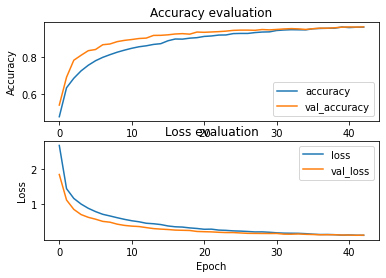

In [ ]:

history = train(model, 43, 128, PATIENCE,X_train_5, y_train_5, X_validation_5, y_validation_5)
plot_history(history)

In [ ]:
X_train_6, y_train_6, X_validation_6, y_validation_6= prepare_dataset(birds_song_wav_mfcc_6)
input_shape = (X_train_6.shape[1], X_train_6.shape[2], 1)

Epoch 1/43
71/71 [==============================] - 3s 44ms/step - loss: 2.1771 - accuracy: 0.5671 - val_loss: 1.2591 - val_accuracy: 0.6868

Epoch 00001: val_loss improved from inf to 1.25915, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
71/71 [==============================] - 3s 42ms/step - loss: 1.1247 - accuracy: 0.7127 - val_loss: 0.7637 - val_accuracy: 0.7946

Epoch 00002: val_loss improved from 1.25915 to 0.76372, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
71/71 [==============================] - 3s 42ms/step - loss: 0.8860 - accuracy: 0.7627 - val_loss: 0.6133 - val_accuracy: 0.8421

Epoch 00003: val_loss improved from 0.76372 to 0.61333, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
71/71 [==============================] - 3s 43ms/step - loss: 0.7534 - accuracy: 0.7910 - val_loss: 0.4965 -

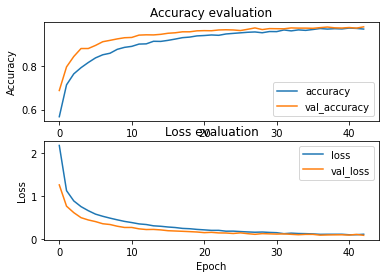

In [ ]:

history = train(model, 43, 128, PATIENCE,X_train_6, y_train_6, X_validation_6, y_validation_6)
plot_history(history)

In [ ]:
X_train_7, y_train_7, X_validation_7, y_validation_7= prepare_dataset(birds_song_wav_mfcc_7)
input_shape = (X_train_7.shape[1], X_train_7.shape[2], 1)

Epoch 1/43
67/67 [==============================] - 3s 45ms/step - loss: 2.4558 - accuracy: 0.5565 - val_loss: 1.4126 - val_accuracy: 0.6709

Epoch 00001: val_loss improved from inf to 1.41259, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
67/67 [==============================] - 3s 42ms/step - loss: 1.2193 - accuracy: 0.6979 - val_loss: 1.0336 - val_accuracy: 0.7386

Epoch 00002: val_loss improved from 1.41259 to 1.03359, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
67/67 [==============================] - 3s 43ms/step - loss: 0.9675 - accuracy: 0.7465 - val_loss: 0.6770 - val_accuracy: 0.8171

Epoch 00003: val_loss improved from 1.03359 to 0.67700, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
67/67 [==============================] - 3s 42ms/step - loss: 0.8158 - accuracy: 0.7765 - val_loss: 0.6220 -

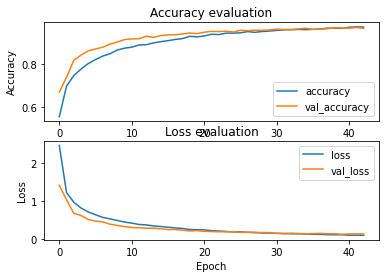

In [ ]:

history = train(model, 43, 128, PATIENCE,X_train_7, y_train_7, X_validation_7, y_validation_7)
plot_history(history)

In [ ]:
X_train_8, y_train_8, X_validation_8, y_validation_8= prepare_dataset(birds_song_wav_mfcc_8)
input_shape = (X_train_8.shape[1], X_train_8.shape[2], 1)

Epoch 1/43
59/59 [==============================] - 3s 45ms/step - loss: 2.7193 - accuracy: 0.5177 - val_loss: 1.8640 - val_accuracy: 0.5714

Epoch 00001: val_loss improved from inf to 1.86402, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
59/59 [==============================] - 3s 43ms/step - loss: 1.3221 - accuracy: 0.6714 - val_loss: 1.0623 - val_accuracy: 0.7169

Epoch 00002: val_loss improved from 1.86402 to 1.06229, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
59/59 [==============================] - 3s 43ms/step - loss: 1.0455 - accuracy: 0.7280 - val_loss: 0.8251 - val_accuracy: 0.7860

Epoch 00003: val_loss improved from 1.06229 to 0.82507, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
59/59 [==============================] - 2s 42ms/step - loss: 0.8935 - accuracy: 0.7613 - val_loss: 0.7134 -

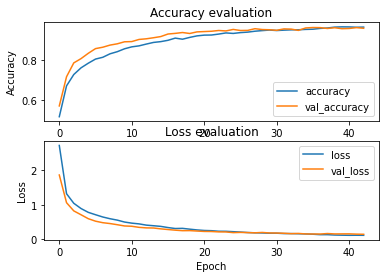

In [ ]:

history = train(model, 43, 128, PATIENCE,X_train_8, y_train_8, X_validation_8, y_validation_8)
plot_history(history)

In [ ]:
X_train_9, y_train_9, X_validation_9, y_validation_9= prepare_dataset(birds_song_wav_mfcc_9)
input_shape = (X_train_9.shape[1], X_train_9.shape[2], 1)

Epoch 1/43
62/62 [==============================] - 3s 43ms/step - loss: 2.4849 - accuracy: 0.5488 - val_loss: 1.3864 - val_accuracy: 0.6490

Epoch 00001: val_loss improved from inf to 1.38643, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
62/62 [==============================] - 3s 43ms/step - loss: 1.2696 - accuracy: 0.6869 - val_loss: 0.9665 - val_accuracy: 0.7474

Epoch 00002: val_loss improved from 1.38643 to 0.96652, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
62/62 [==============================] - 3s 44ms/step - loss: 0.9884 - accuracy: 0.7373 - val_loss: 0.7658 - val_accuracy: 0.8028

Epoch 00003: val_loss improved from 0.96652 to 0.76577, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
62/62 [==============================] - 3s 43ms/step - loss: 0.8314 - accuracy: 0.7748 - val_loss: 0.6249 -

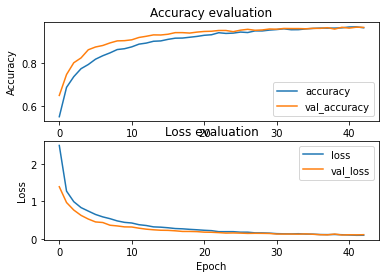

In [ ]:

history = train(model, 43, 128, PATIENCE,X_train_9, y_train_9, X_validation_9, y_validation_9)
plot_history(history)

In [ ]:
X_train_10, y_train_10, X_validation_10, y_validation_10= prepare_dataset(birds_song_wav_mfcc_10)
input_shape = (X_train_9.shape[1], X_train_9.shape[2], 1)

Epoch 1/43
73/73 [==============================] - 4s 51ms/step - loss: 2.2008 - accuracy: 0.5964 - val_loss: 1.4878 - val_accuracy: 0.6470

Epoch 00001: val_loss improved from inf to 1.48778, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 2/43
73/73 [==============================] - 3s 42ms/step - loss: 1.1029 - accuracy: 0.7198 - val_loss: 0.9165 - val_accuracy: 0.7628

Epoch 00002: val_loss improved from 1.48778 to 0.91654, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 3/43
73/73 [==============================] - 3s 42ms/step - loss: 0.9196 - accuracy: 0.7552 - val_loss: 0.6884 - val_accuracy: 0.8179

Epoch 00003: val_loss improved from 0.91654 to 0.68843, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/birds_song/mfcc_13_6s_v3/model.h5
Epoch 4/43
73/73 [==============================] - 3s 42ms/step - loss: 0.8010 - accuracy: 0.7811 - val_loss: 0.6257 -

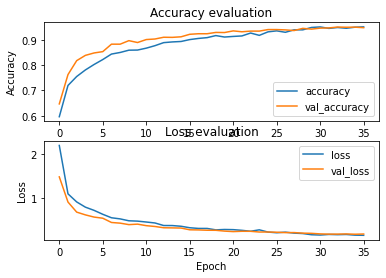

In [ ]:
history = train(model, 43, 128, PATIENCE,X_train_10, y_train_10, X_validation_10, y_validation_10)
plot_history(history)

# save

In [ ]:
SAVED_MODEL_FINAL_PATH = '/content/drive/MyDrive/Colab Notebooks/dataset/birds_song/13_6s_v3/model_final_6s_lap_v1.h5'
model.save(SAVED_MODEL_FINAL_PATH)